In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import numpy as np

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
path = "./data/"

In [4]:
geo_str = json.load(open(path + "seoul_geo.json", encoding="utf-8"))

# 서울특별시 전동킥보드 견인 현황

In [5]:
data = pd.read_csv(path + "서울특별시_전동킥보드_견인_현황_20220731.csv", encoding="cp949")
data.dropna(inplace=True)
data["신고연월"] = data["신고일"].apply(lambda x: x[:7])
data["신고분기"] = data["신고연월"].apply(lambda x: x[:-2]+str((int(x[-2:])+2)//3))
data.drop(data[data["신고연월"]=="2022-07"].index, inplace=True)

## 신고 장소
- 보도와 차도가 구분된 도로의 차도
- 횡단보도, 산책로 등
- 버스정류장, 택시정거장
- 점자블록, 엘리베이터 입구
- 지하철역 진출입로 및 주변
- 보도 중앙
- 자전거 도로
- 건물, 상가 보행자 진출입
- 소방시설 5m 이내 구역

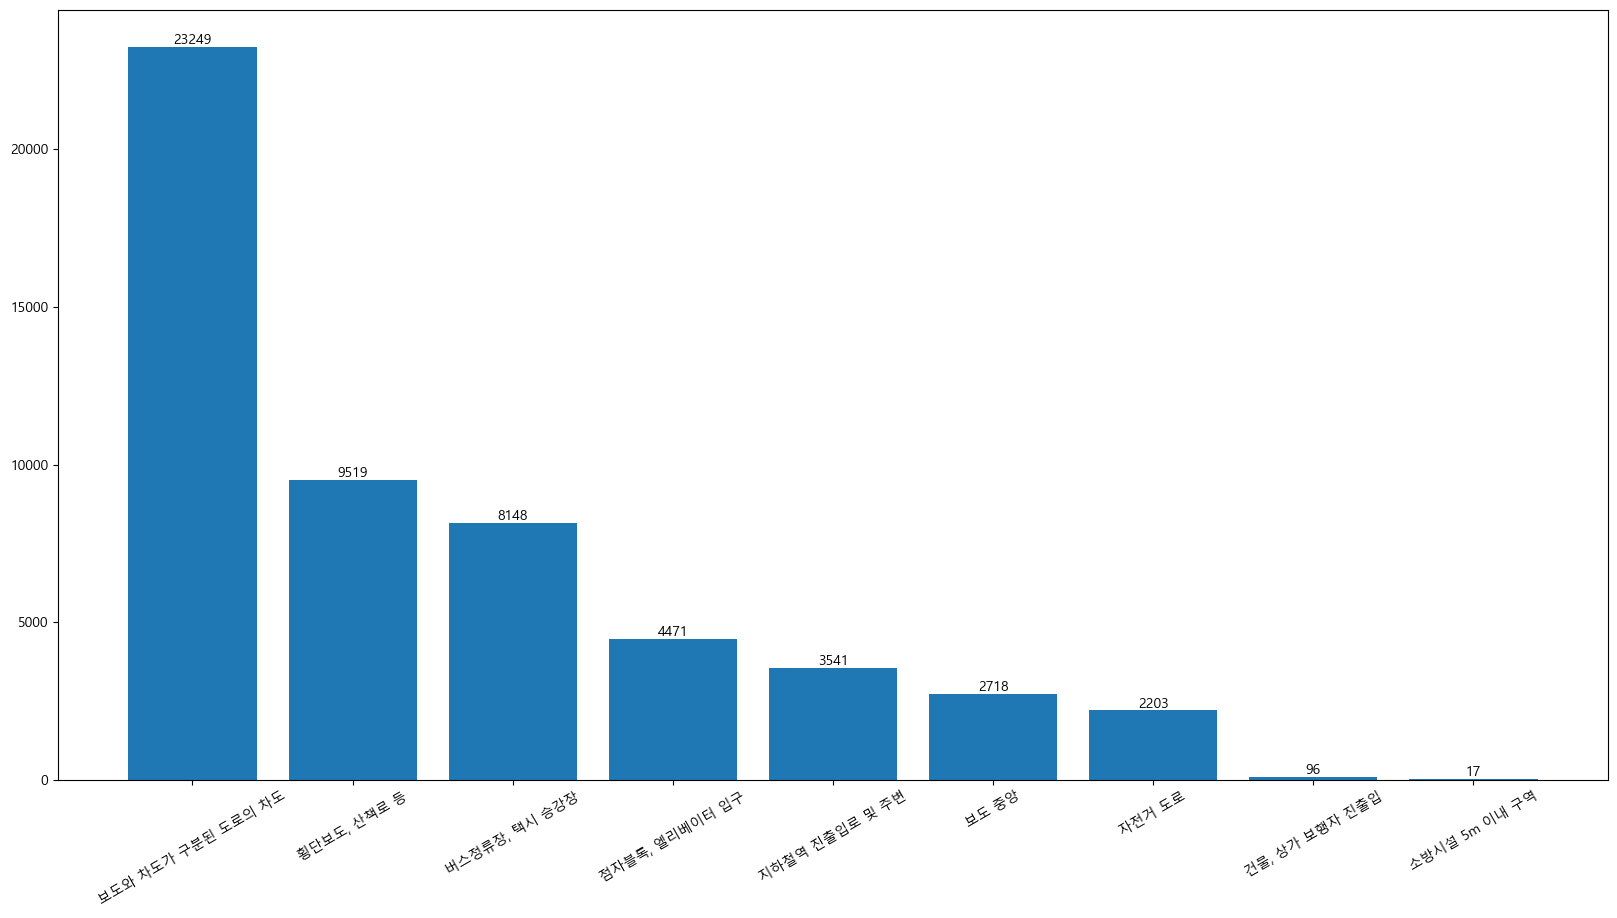

In [8]:
temp = data.groupby("유형")["번호"].count().drop(labels=["오신고", "기타"]).sort_values(ascending=False)[:9]
x = temp.index
y = temp

plt.figure(figsize=(20, 10))
p = plt.bar(x=x, height=y)
plt.xticks(rotation=30)
plt.bar_label(p)
plt.show()

## 자치구

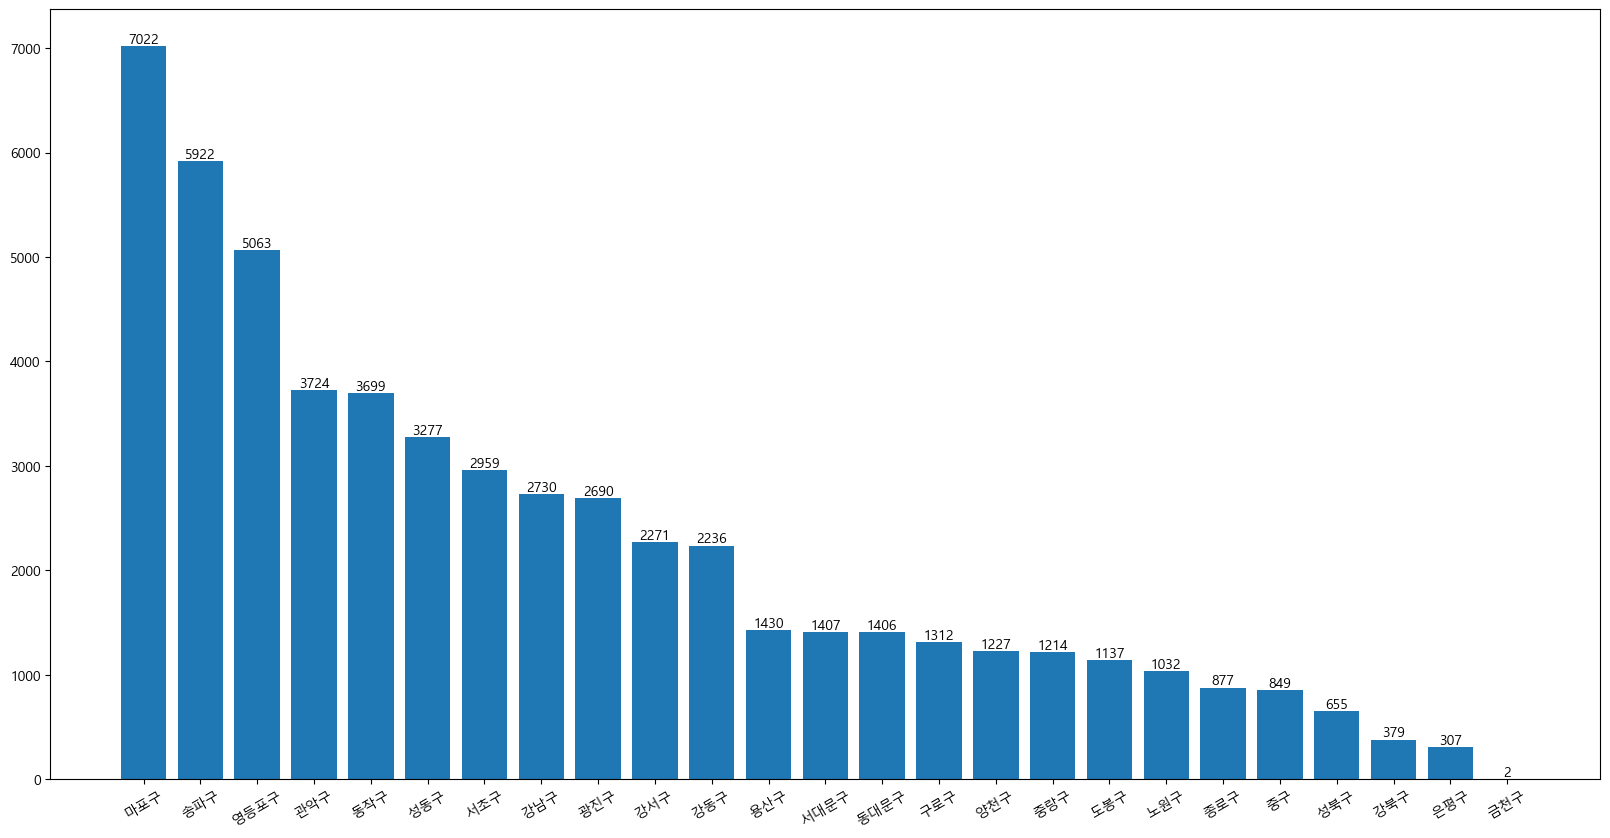

In [8]:
temp = data.groupby("구정보")["번호"].count().sort_values(ascending=False)
x = temp.index
y = temp

plt.figure(figsize=(20, 10))
p = plt.bar(x=x, height=y)
plt.xticks(rotation=30)
plt.bar_label(p)
plt.show()

In [9]:
temp = pd.DataFrame(data.groupby("구정보")["번호"].count().sort_values(ascending=False)).reset_index().rename({"구정보":"구별", "번호":"견인수"}, axis=1)

seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

fmap = folium.Choropleth(geo_data=geo_str,
                         data=temp,
                         columns=["구별", "견인수"],
                         fill_color="PuBu", 
                         line_opacity=0.5,
                         key_on="feature.properties.name",
                         highlight=True).add_to(seoul_map)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(folium.features.GeoJsonTooltip(["name"],labels=False))
display(seoul_map)

## 신고연월

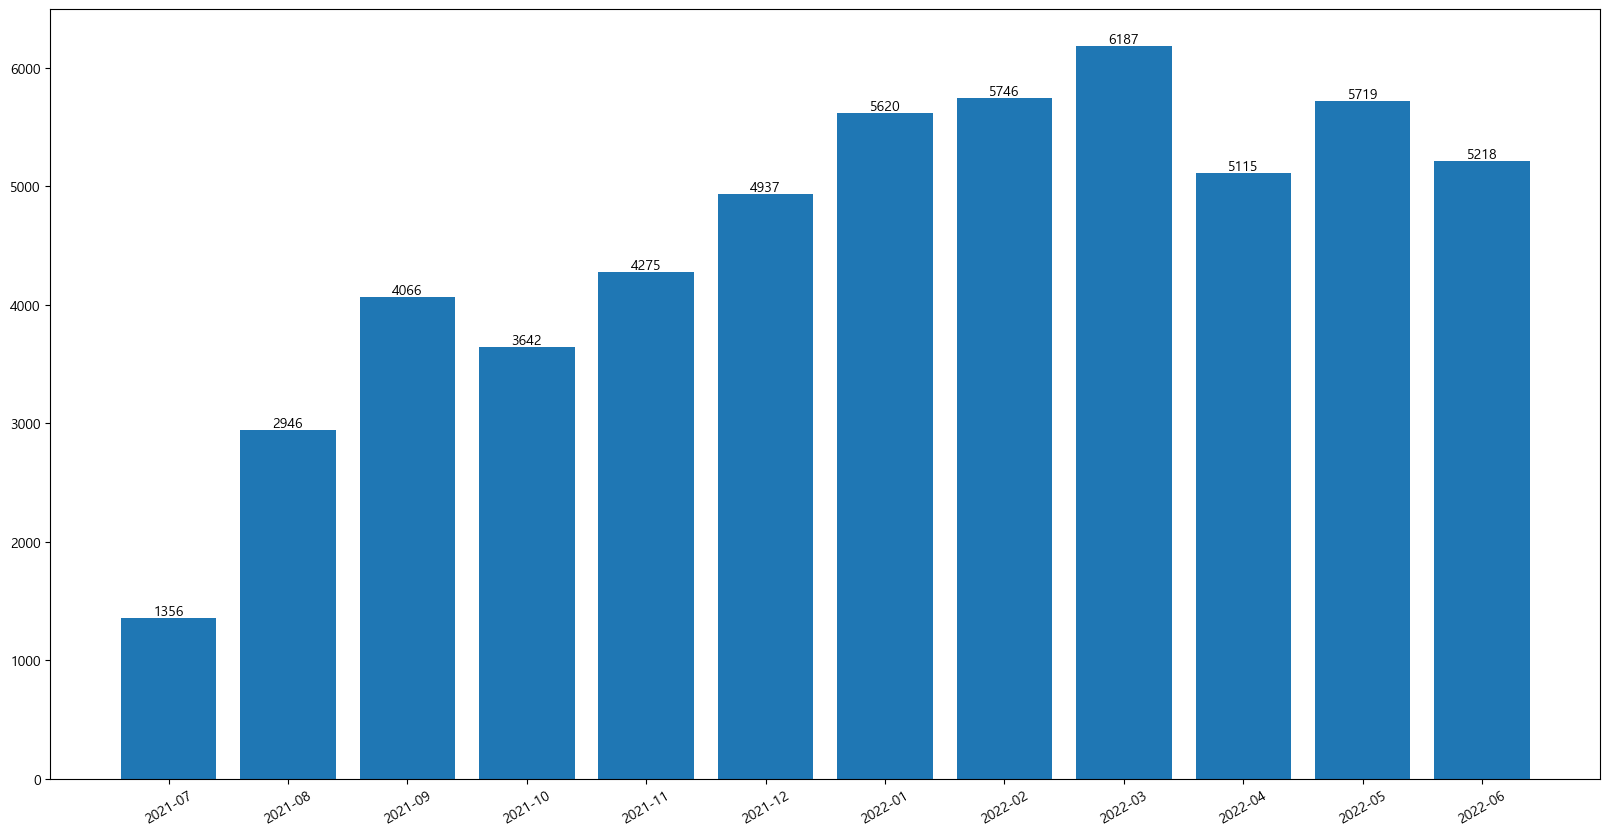

In [10]:
temp = data.groupby("신고연월")["번호"].count()
x = temp.index
y = temp

plt.figure(figsize=(20, 10))
p = plt.bar(x=x, height=y)
plt.xticks(rotation=30)
plt.bar_label(p)
plt.show()

## 신고분기

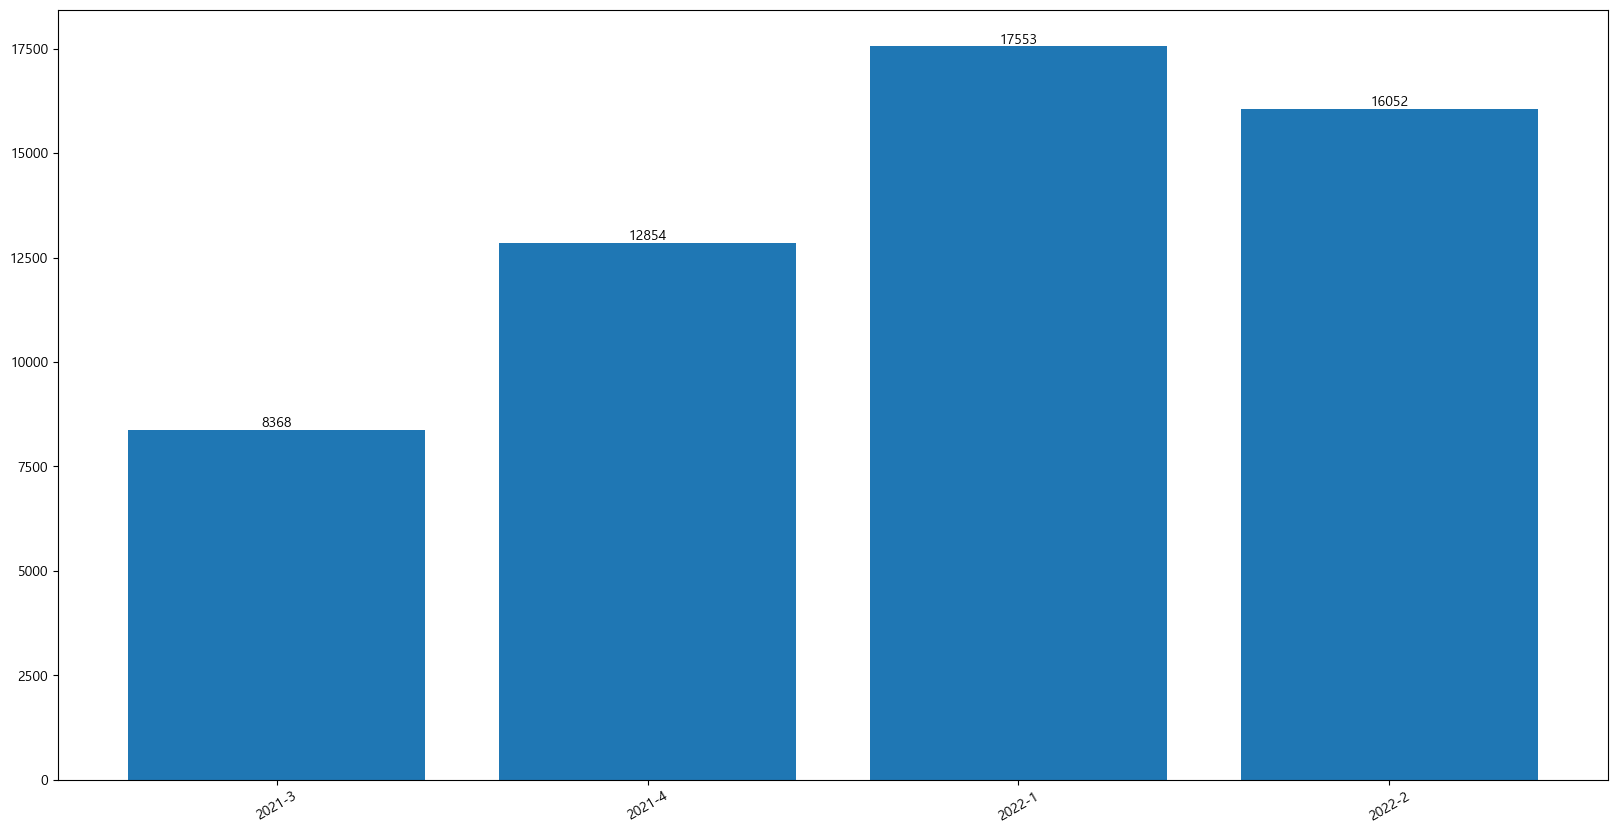

In [11]:
temp = data.groupby("신고분기")["번호"].count()
x = temp.index
y = temp

plt.figure(figsize=(20, 10))
p = plt.bar(x=x, height=y)
plt.xticks(rotation=30)
plt.bar_label(p)
plt.show()

## 월별 분석

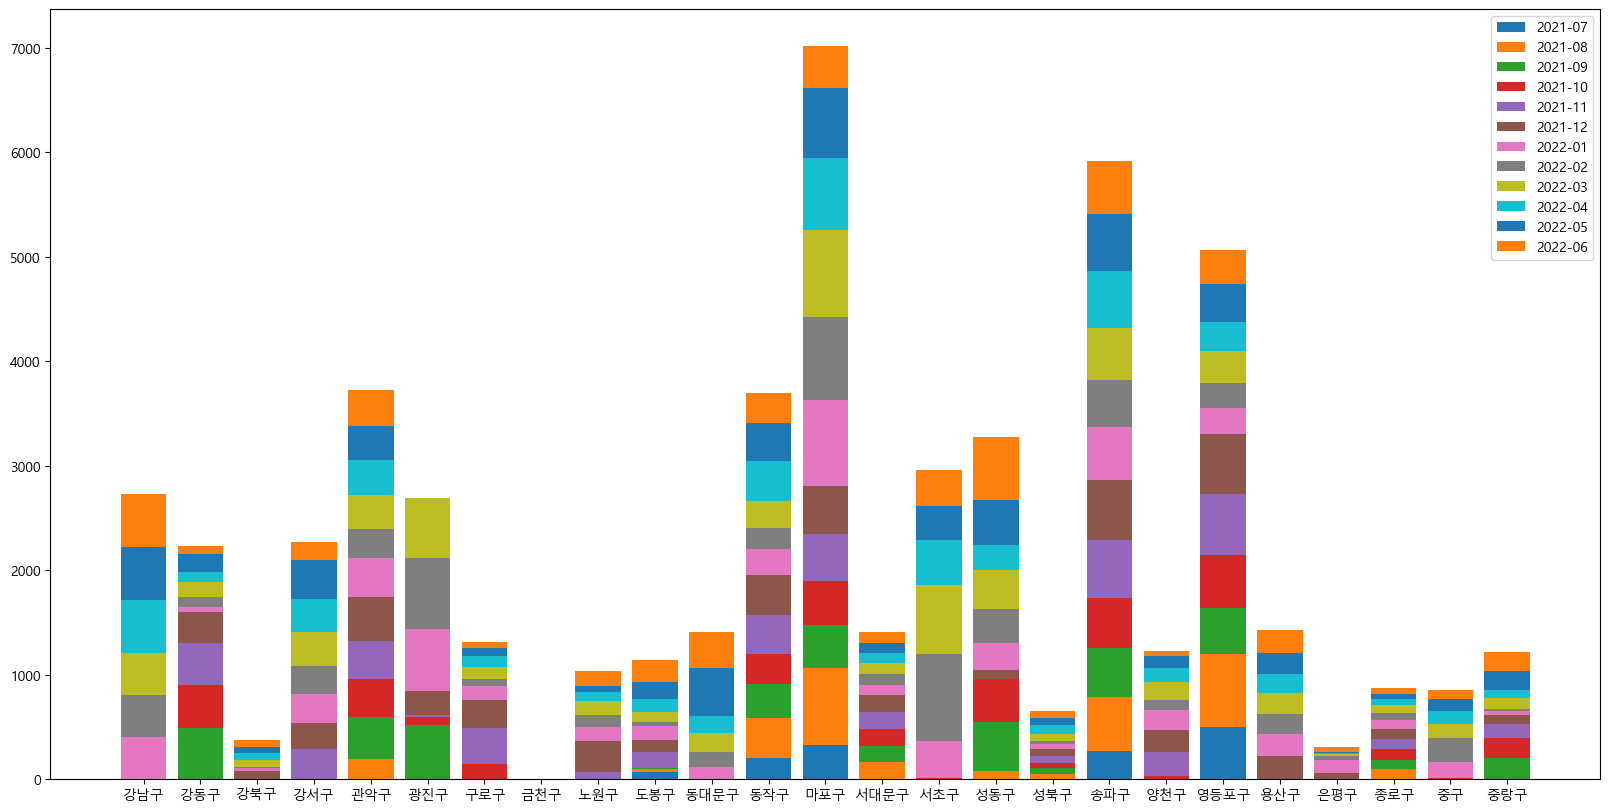

In [13]:
temp = data.pivot_table(values="번호", index=["구정보"], columns=["신고연월"], aggfunc="count", fill_value=0)

bottom = pd.Series(np.zeros(len(temp)), index=temp.index)

plt.figure(figsize=(20, 10))

for col in temp.columns:
    plt.bar(temp.index, temp[col], bottom=bottom, label=col)
    bottom = bottom + temp[col]
    
plt.legend()
plt.show()

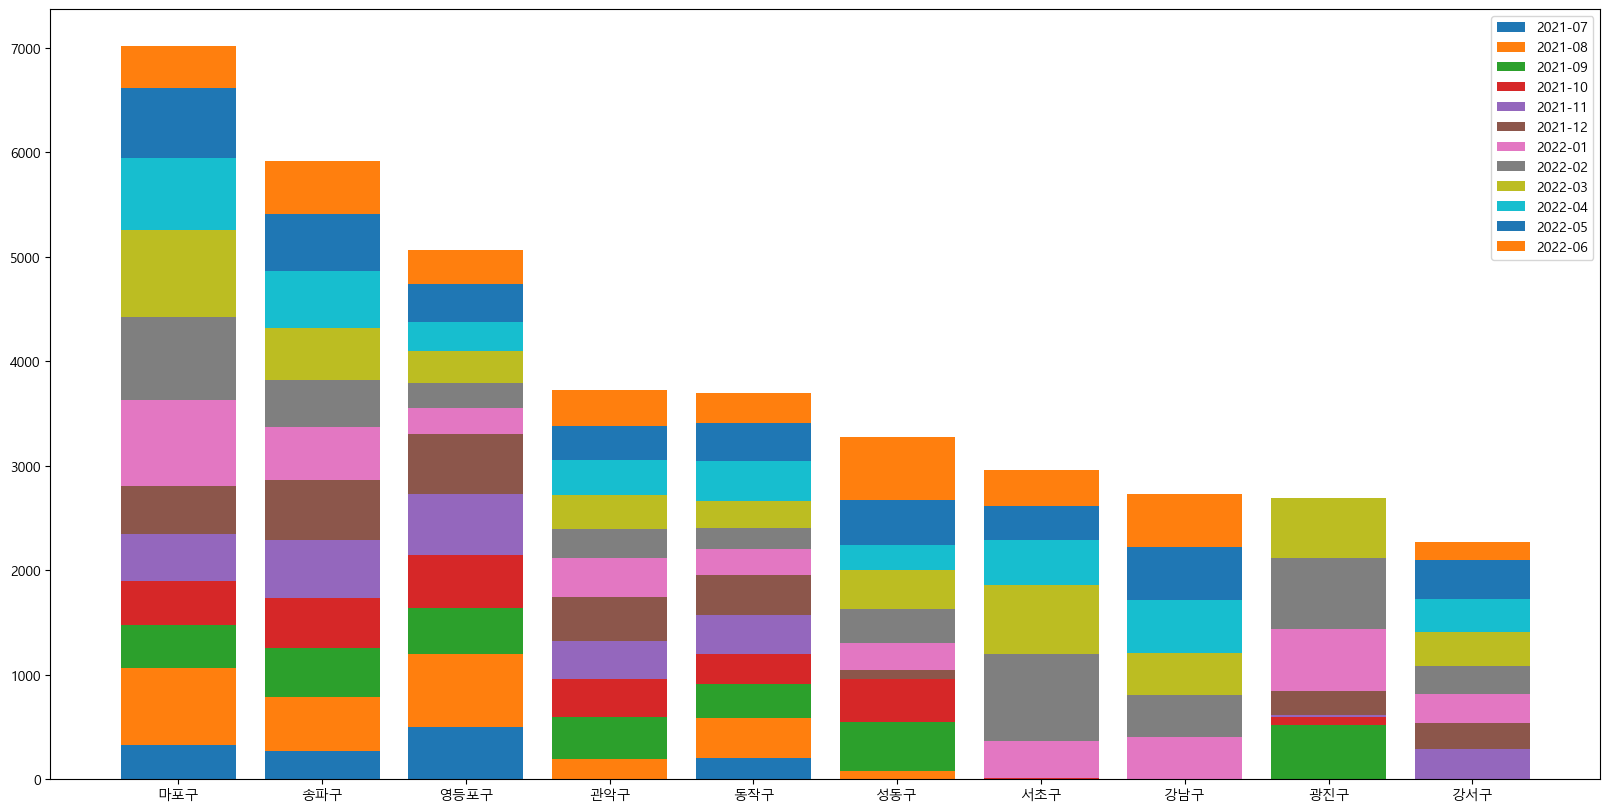

In [14]:
temp_index = data.groupby("구정보")["번호"].count().sort_values(ascending=False)[:10].index
temp = data.pivot_table(values="번호", index=["신고연월"], columns=["구정보"], aggfunc="count", fill_value=0)[temp_index].T

bottom = pd.Series(np.zeros(len(temp)), index=temp.index)

plt.figure(figsize=(20, 10))

for col in temp.columns:
    plt.bar(temp.index, temp[col], bottom=bottom, label=col)
    bottom = bottom + temp[col]
    
plt.legend()
plt.show()

## 분기별 분석

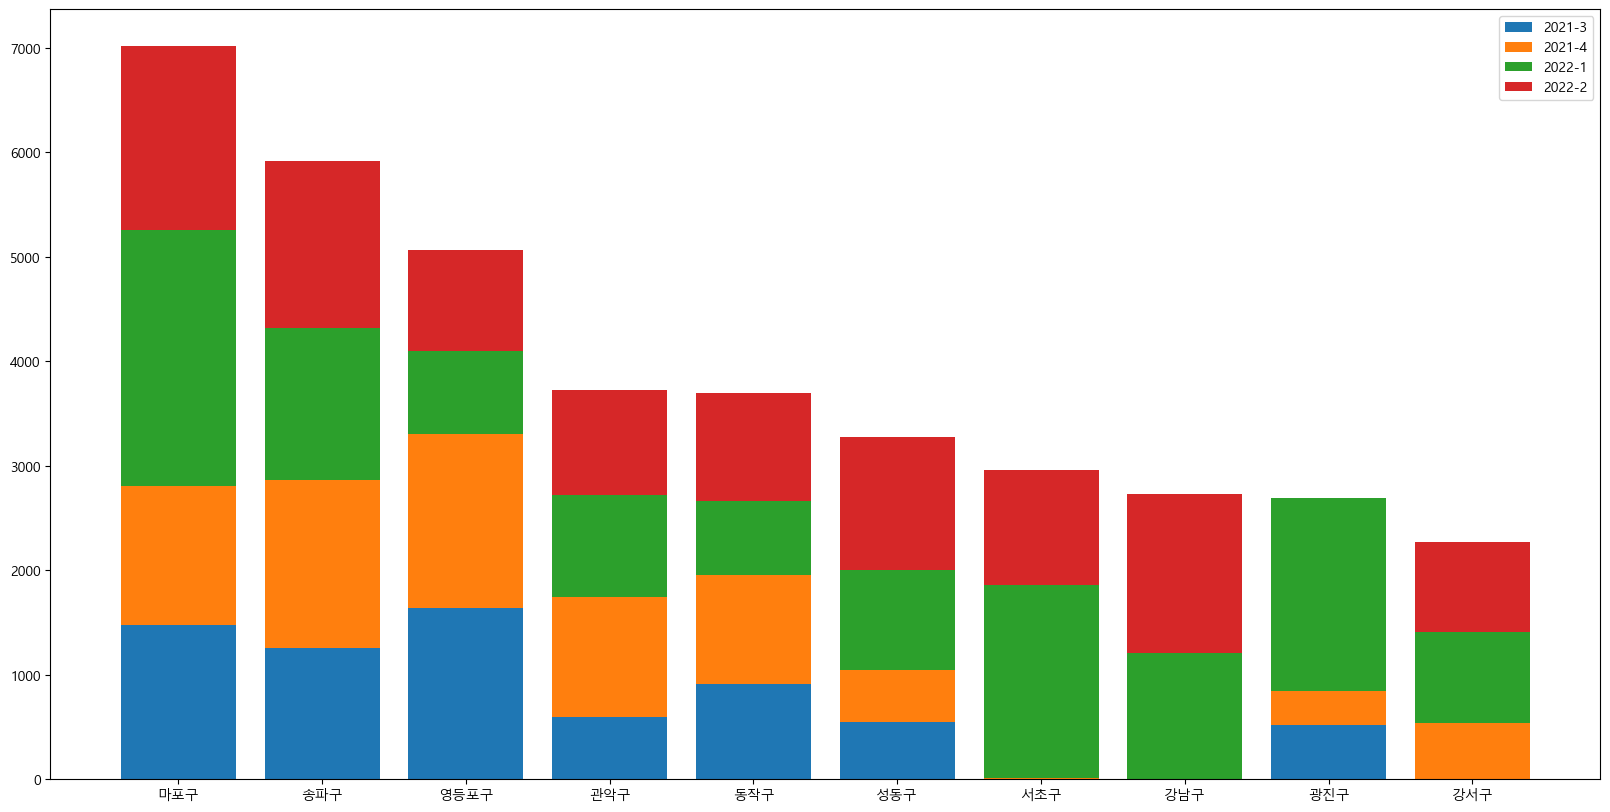

In [15]:
temp_index = data.groupby("구정보")["번호"].count().sort_values(ascending=False)[:10].index
temp = data.pivot_table(values="번호", index=["신고분기"], columns=["구정보"], aggfunc="count", fill_value=0)[temp_index].T

bottom = pd.Series(np.zeros(len(temp)), index=temp.index)

plt.figure(figsize=(20, 10))

for col in temp.columns:
    plt.bar(temp.index, temp[col], bottom=bottom, label=col)
    bottom = bottom + temp[col]

plt.legend()
plt.show()